In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()  

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.data_structure import IntervalData
from interClusLib.similarity_distance import IntervalMetrics
from interClusLib.interval_clustering import IntervalKMeans
from interClusLib.visualization import ClusteringVisualization

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(30, 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0         58.975691        65.618273        46.884286        71.839589   
1         12.515938        20.274654        30.383042        60.597170   
2         10.917419        21.238242        47.136405        99.254447   
3         20.949302        46.790079        37.768239        72.936454   
4         46.587251        67.849095        76.182377        86.900184   
5          7.405865        95.969629        45.934846        50.834977   
6         19.799391        35.758269        88.849215        94.305843   
7          4.120424        68.160457        25.030660        30.256051   
8         14.997468        50.953905         2.112978        56.256865   
9         55.251407        58.569695        15.368645        22.689441   
10         7.677961        62.987593        62.027857        82.228

In [2]:
print(type(random_data))      
print(type(random_data.data))  
print(random_data.data.shape)  

<class 'interClusLib.data_structure.IntervalData'>
<class 'pandas.core.frame.DataFrame'>
(30, 6)


In [3]:
distance_matrix = IntervalMetrics.pairwise_distance(random_data.get_intervals(),"hausdorff","mean")

print(distance_matrix)

[[ 0.         33.54089535 27.59356329 20.81991821 16.53032344 18.35871394
  31.00232782 29.83609777 26.13823594 19.91309362 16.13845878 21.53909612
  28.28846301 15.80773536 20.31063369 32.99942295 23.47617861 21.56153436
  15.67659934 19.63690391 12.22811495 16.32148996 15.1528725  14.98755333
  15.33574023 12.90984672 21.07339375 15.92548743 23.69715376 26.68012083]
 [33.54089535  0.         16.09806316 13.99882351 32.27406428 34.92892027
  41.53112166 17.42558124 18.70363295 36.33431498 26.95870316 35.55431987
  19.2308463  28.62401761 52.11350786 29.84388779 26.2369189  18.68609579
  33.18342957 38.82965415 24.36620214 19.99065034 24.64396247 27.46993589
  28.94229996 23.60447541 28.42024888 24.52315434 24.47597736  9.93989093]
 [27.59356329 16.09806316  0.         14.1271098  19.05799047 34.40615344
  27.18623131 27.03677258 23.38846457 39.6348704  14.4769228  38.8548753
   9.96263547 24.74756697 38.08396178 32.87802334 28.98131055 20.84919962
  31.04181101 41.97117896 20.52923357

In [4]:
model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals(),distance_func=IntervalMetrics.hausdorff_distance_md,operator="mean") 

print(model.labels_)

[1 3 2 3 2 1 1 3 3 0 2 1 2 0 1 1 0 3 1 0 2 2 1 2 0 1 1 0 0 3]


In [5]:
def plot_intervals_3D(intervals, labels=None):
    fig= plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111,projection='3d')
    ClusteringVisualization.draw_3d_interval_cubes(ax, intervals, labels)

    xs = intervals[:, 0, :].ravel()  # x_lower, x_upper
    ys = intervals[:, 1, :].ravel()  # y_lower, y_upper
    zs = intervals[:, 2, :].ravel()  # z_lower, z_upper

    x_min, x_max = xs.min() - 5, xs.max() + 5
    y_min, y_max = ys.min() - 5, ys.max() + 5
    z_min, z_max = zs.min() - 5, zs.max() + 5

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)

    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("x3")
    ax.set_title("3D")

    plt.show()

def plot_intervals_as_squares(intervals, labels=None):
    fig, ax = plt.subplots(figsize=(6,6))
    ClusteringVisualization.draw_interval_squares(ax, intervals, labels)

    min_val = intervals.min() - 1
    max_val = intervals.max() + 1
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    ax.set_aspect('equal', 'box')
    
    ax.set_xlabel("Coordinate X (lower →)")
    ax.set_ylabel("Coordinate Y (lower →)")
    ax.set_title("1D Intervals as Squares")
    plt.show()

def plot_2d_intervals(intervals, labels=None):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    ClusteringVisualization.draw_interval_rectangles(ax, intervals, labels=labels)
    
    # 根据 intervals 范围调整坐标
    x_vals = intervals[:, 0, :].ravel()  # 所有 x_lower, x_upper
    y_vals = intervals[:, 1, :].ravel()  # 所有 y_lower, y_upper
    x_min, x_max = x_vals.min() - 1, x_vals.max() + 1
    y_min, y_max = y_vals.min() - 1, y_vals.max() + 1
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # 让坐标系的 x,y 单位看起来相等
    ax.set_aspect('equal', 'box')
    
    ax.set_xlabel("X dimension")
    ax.set_ylabel("Y dimension")
    ax.set_title("2D Interval Rectangles")
    plt.show()


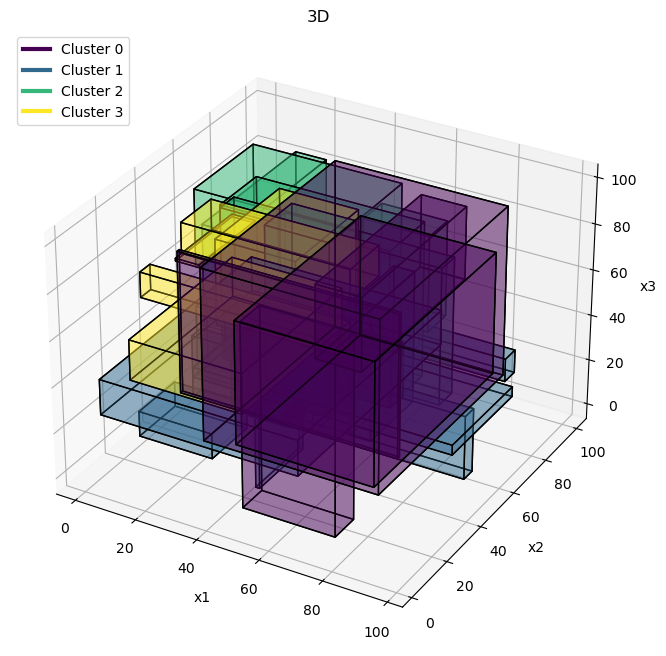

In [6]:
plot_intervals_3D(random_data.get_intervals(), model.labels_)


 Random Interval Data:
    feature_1_lower  feature_1_upper
0          8.801132        26.936548
1         33.598392        68.424127
2         56.601704        61.757387
3          1.986272        17.482003
4          9.474522        25.737944
5         28.835035        90.822537
6         62.238331        79.535882
7         39.923911        99.584001
8          9.240199        27.740609
9         64.409252        67.271431
10        32.498244        53.730571
11         6.140683        56.699961
12        14.070860        88.059100
13         5.310302        95.703970
14        13.009513        31.804873
15        15.913358        29.892857
16         3.708830        70.752245
17         5.238349        75.002067
18         8.611265        44.233013
19        14.398186        42.778176
20        55.015447        57.252806
21        20.134856        47.735408
22        25.938885        63.036735
23        25.128934        66.728130
24        23.971515        47.963295
25         5.1

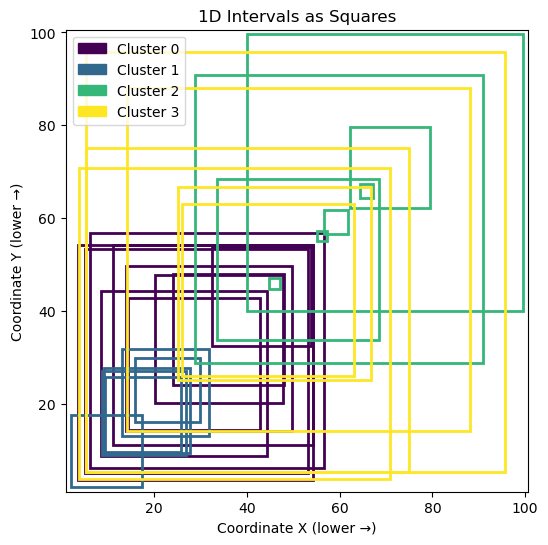

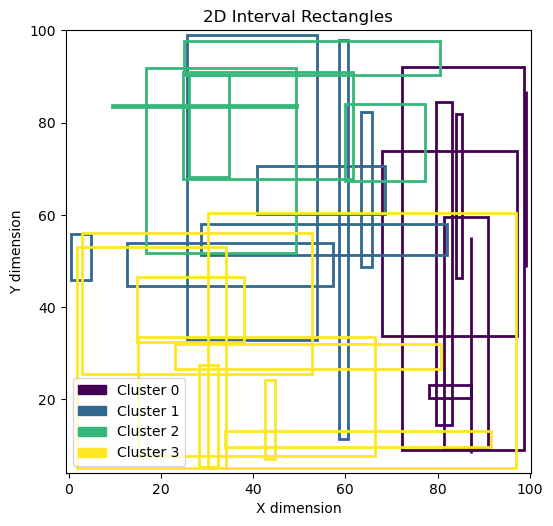

In [7]:
random_data = IntervalData.random_data(30, 1)
print("\n Random Interval Data:")
print(random_data.data)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals(),distance_func=IntervalMetrics.hausdorff_distance_md,operator="mean")

plot_intervals_as_squares(random_data.get_intervals(), model.labels_)

random_data = IntervalData.random_data(30, 2)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals(),distance_func=IntervalMetrics.hausdorff_distance_md,operator="mean")

plot_2d_intervals(random_data.get_intervals(), model.labels_)

In [8]:
random_data = IntervalData.random_data(30, 2)
print("\n Random Interval Data:")
print(random_data.data)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals(),distance_func=IntervalMetrics.hausdorff_distance_md,operator="mean")

plot_2d_intervals(random_data.get_intervals(), model.labels_)

SyntaxError: invalid syntax (658113819.py, line 5)